In [109]:
import akshare as ak

fund = ak.fund_name_em()

print(fund.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17842 entries, 0 to 17841
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   基金代码    17842 non-null  object
 1   拼音缩写    17842 non-null  object
 2   基金简称    17842 non-null  object
 3   基金类型    17842 non-null  object
 4   拼音全称    17842 non-null  object
dtypes: object(5)
memory usage: 697.1+ KB
None


In [9]:
print(fund[['基金代码','基金简称', '基金类型']])

         基金代码                  基金简称     基金类型
0      000001                华夏成长混合   混合型-灵活
1      000002            华夏成长混合(后端)   混合型-灵活
2      000003              中海可转债债券A  债券型-可转债
3      000004              中海可转债债券C  债券型-可转债
4      000005            嘉实增强信用定期债券   债券型-长债
...       ...                   ...      ...
17808  970203          银河水星聚利中短债债券E  债券型-中短债
17809  970204  兴证资管金麒麟兴享增利六个月持有期债券A  债券型-混合债
17810  970205  兴证资管金麒麟兴享增利六个月持有期债券C  债券型-混合债
17811  970206         中金优势领航一年持有混合C   混合型-偏股
17812  980003           太平洋六个月滚动持有债   债券型-长债

[17813 rows x 3 columns]


In [12]:
index_fund = ak.fund_info_index_em(symbol="行业主题")
print(index_fund)

       基金代码                 基金名称    单位净值          日期  日增长率   近1周   近1月    近3月  \
0    007937       华夏饲料豆粕期货ETF联接A  1.7611  2022-12-07  0.82  1.01  2.80  12.32   
1    007938       华夏饲料豆粕期货ETF联接C  1.7458  2022-12-07  0.83  1.01  2.77  12.24   
2    008279         国泰中证煤炭ETF联接A  2.0131  2022-12-07 -1.87 -2.55 -2.78 -14.01   
3    161032       富国中证煤炭指数(LOF)A  1.9480  2022-12-07 -1.81 -2.55 -2.75 -14.37   
4    008280         国泰中证煤炭ETF联接C  1.9941  2022-12-07 -1.87 -2.55 -2.80 -14.07   
..      ...                  ...     ...         ...   ...   ...   ...    ...   
663  017227  富国中证全指家用电器ETF发起式联接C  1.0000  2022-12-06   NaN   NaN   NaN    NaN   
664  016909          华安中证基建指数发起C  1.0720  2022-12-07 -1.16  1.42   NaN    NaN   
665  017222    富国中证电池主题ETF发起式联接A  1.0000  2022-12-02   NaN   NaN   NaN    NaN   
666  017223    富国中证电池主题ETF发起式联接C  1.0000  2022-12-02   NaN   NaN   NaN    NaN   
667  016044              东财证券30C  0.9979  2022-12-02   NaN   NaN   NaN    NaN   

       近6月    近1年    近2年   

In [16]:
fund_open= ak.fund_open_fund_daily_em()



KeyError: 161725

In [25]:
print(fund_open.loc[fund_open['基金代码'] == '161725'])

        基金代码            基金简称 2022-12-07-单位净值 2022-12-07-累计净值 2022-12-06-单位净值  \
2235  161725  招商中证白酒指数(LOF)A          1.1005          2.8166          1.0994   

     2022-12-06-累计净值    日增长值  日增长率 申购状态  赎回状态    手续费  
2235          2.8155  0.0011  0.10  限大额  开放赎回  0.10%  


In [28]:
fund_etf_hist = ak.fund_etf_hist_sina(symbol="sz161725")

<AxesSubplot: xlabel='date'>

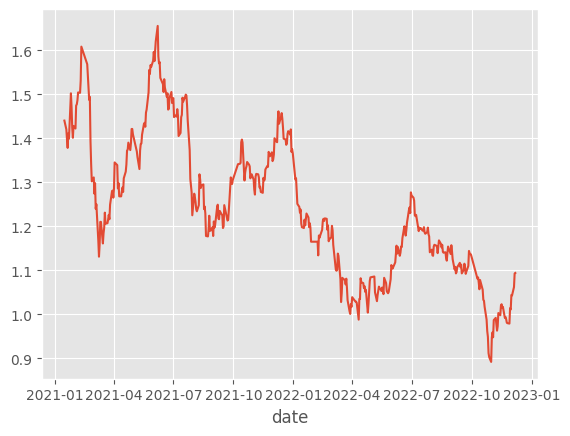

In [110]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fund_etf_hist['close'].plot(kind='line')

In [45]:
profit_y = ak.stock_profit_sheet_by_yearly_em(symbol='sz000858')

In [66]:
profit_y['REPORT_DATE']

0     2021-12-31 00:00:00
1     2020-12-31 00:00:00
2     2019-12-31 00:00:00
3     2018-12-31 00:00:00
4     2017-12-31 00:00:00
5     2016-12-31 00:00:00
6     2015-12-31 00:00:00
7     2014-12-31 00:00:00
8     2013-12-31 00:00:00
9     2012-12-31 00:00:00
10    2011-12-31 00:00:00
11    2010-12-31 00:00:00
12    2009-12-31 00:00:00
13    2008-12-31 00:00:00
14    2007-12-31 00:00:00
15    2006-12-31 00:00:00
16    2005-12-31 00:00:00
17    2004-12-31 00:00:00
18    2003-12-31 00:00:00
19    2002-12-31 00:00:00
20    2001-12-31 00:00:00
21    2000-12-31 00:00:00
22    1999-12-31 00:00:00
23    1998-12-31 00:00:00
24    1997-12-31 00:00:00
25    1996-12-31 00:00:00
26    1995-12-31 00:00:00
Name: REPORT_DATE, dtype: object

<AxesSubplot: xlabel='REPORT_DATE'>

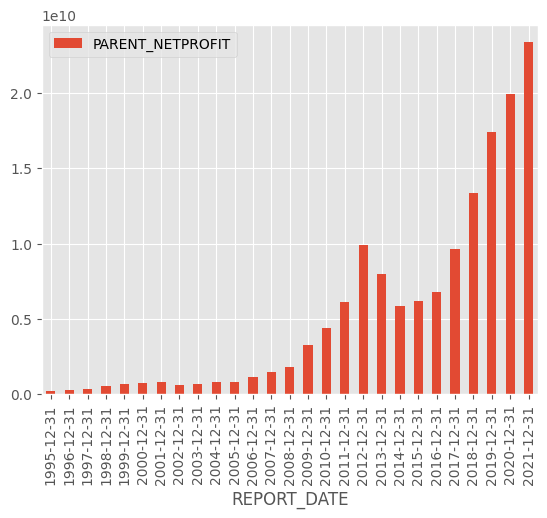

In [68]:
profit_y['REPORT_DATE'] = pd.to_datetime(profit_y['REPORT_DATE']).dt.date
profit_y[['REPORT_DATE', 'PARENT_NETPROFIT']].sort_values(by='REPORT_DATE', ascending=True).plot.bar(x='REPORT_DATE', y='PARENT_NETPROFIT')

In [90]:
stock = ak.stock_zh_a_hist(symbol="000858", period="daily", start_date="19950101")

In [108]:
cl = stock[['日期', '收盘']]
cl
cl['日期'] = pd.to_datetime(cl['日期'])
cl.set_index('日期')
daily_ret = cl['收盘'].pct_change()
print(cl.info())
# monthly_ret = cl.resample('M').apply(lambda x : ((1+x).prod() - 1))
# monthly_ret

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      5835 non-null   datetime64[ns]
 1   收盘      5835 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 91.3 KB
None


/var/folders/ym/dk1zm97d37174p50vm3lr_hw0000gn/T/ipykernel_68139/1124507616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['日期'] = pd.to_datetime(cl['日期'])


In [39]:
fund_etf_hist.index = fund_etf_hist['date']
print(fund_etf_hist)

                  date   open   high    low  close    volume
date                                                        
2021-01-15  2021-01-15  1.469  1.469  1.396  1.440  19847285
2021-01-18  2021-01-18  1.440  1.458  1.400  1.420  16782375
2021-01-19  2021-01-19  1.427  1.456  1.395  1.397  21713673
2021-01-20  2021-01-20  1.370  1.389  1.330  1.378  19083212
2021-01-21  2021-01-21  1.367  1.417  1.360  1.411  29979982
...                ...    ...    ...    ...    ...       ...
2022-12-01  2022-12-01  1.035  1.065  1.035  1.044  86732142
2022-12-02  2022-12-02  1.042  1.059  1.038  1.043  32575357
2022-12-05  2022-12-05  1.060  1.069  1.054  1.062  50558201
2022-12-06  2022-12-06  1.054  1.115  1.052  1.093  90638821
2022-12-07  2022-12-07  1.091  1.115  1.078  1.094  54977311

[459 rows x 6 columns]


In [1]:
import pandas as pd


print(pd.__version__)

1.5.2


In [8]:
import pandas._testing as tm

df = tm.makeTimeDataFrame()
print(df)
# print(df.shape)


                   A         B         C         D
2000-01-03 -0.052497 -1.498810 -0.406141  0.423426
2000-01-04 -2.821748  0.942738  2.558954  0.388742
2000-01-05  1.330019 -2.326515  2.084812 -0.133237
2000-01-06 -2.242020  0.662805  0.295312 -0.815601
2000-01-07  0.354303 -0.329291  1.047051 -0.139871
2000-01-10 -0.006232 -0.025976  0.678535 -0.246682
2000-01-11 -1.400641  0.391177 -0.535815  1.256723
2000-01-12 -0.581576 -0.263469  0.951054 -0.568465
2000-01-13  1.221236  1.026774 -1.412184  0.247515
2000-01-14  0.172357 -2.095279  0.963883  0.282156
2000-01-17 -1.093678 -1.369318  0.752759 -0.093521
2000-01-18  0.162305 -0.323821 -0.397743 -1.487013
2000-01-19 -2.173847  0.521081  0.926439  0.326943
2000-01-20  1.242346  0.447264 -0.138285 -1.618921
2000-01-21  0.398586  1.469227 -1.498797  0.133314
2000-01-24  0.841876 -0.020254 -0.177589  0.417618
2000-01-25 -0.000482  1.359555 -0.835274 -0.049439
2000-01-26  0.408774  1.691006 -0.361300  0.135462
2000-01-27 -0.206729  0.015944 

In [10]:
np_a = df.to_numpy()
print(np_a[0:5,0])

[-0.05249704 -2.82174812  1.33001891 -2.24202039  0.35430294]


In [11]:
index = pd.date_range('1/1/2023', periods=4, freq='T')
s = pd.Series([0.0, None, 2.0, 3.0], index=index)
df = pd.DataFrame({'s': s})
df

,s
2023-01-01 00:00:00,0.0
2023-01-01 00:01:00,NaN
2023-01-01 00:02:00,2.0
2023-01-01 00:03:00,3.0


unsample this into 30 seconds bins

In [12]:
df.asfreq(freq='30S')

,s
2023-01-01 00:00:00,0.0
2023-01-01 00:00:30,NaN
2023-01-01 00:01:00,NaN
2023-01-01 00:01:30,NaN
2023-01-01 00:02:00,2.0
2023-01-01 00:02:30,NaN
2023-01-01 00:03:00,3.0


provide a fill_value

In [13]:
df.asfreq(freq='30S', fill_value=9.0)

,s
2023-01-01 00:00:00,0.0
2023-01-01 00:00:30,9.0
2023-01-01 00:01:00,NaN
2023-01-01 00:01:30,9.0
2023-01-01 00:02:00,2.0
2023-01-01 00:02:30,9.0
2023-01-01 00:03:00,3.0


provide a method

In [15]:
df.asfreq(freq='30S', method='bfill')

,s
2023-01-01 00:00:00,0.0
2023-01-01 00:00:30,0.0
2023-01-01 00:01:00,NaN
2023-01-01 00:01:30,NaN
2023-01-01 00:02:00,2.0
2023-01-01 00:02:30,2.0
2023-01-01 00:03:00,3.0


In [26]:
import numpy as np

day_index = pd.date_range('2023-01-01', periods=30, freq='D')
day_s = pd.Series(np.random.randn(30), index=day_index)
day_df = pd.DataFrame({'s': day_s})
day_df


,s
2023-01-01,-0.135672
2023-01-02,1.715208
2023-01-03,-0.549445
2023-01-04,0.862464
2023-01-05,0.747102
2023-01-06,-1.572884
2023-01-07,-0.271414
2023-01-08,-0.391117
2023-01-09,1.368420
2023-01-10,1.967970


In [31]:
day_df.asfreq(freq='15D')

,s
2023-01-01,-0.135672
2023-01-16,0.169197


In [35]:
import akshare as ak

stock_sse_summary_df = ak.stock_sse_summary()
print(stock_sse_summary_df)



      项目         股票         主板       科创板
0   流通股本   42254.34   41528.71    725.63
1    总市值  474021.31   413743.9  60277.41
2  平均市盈率      13.05      11.87     45.84
3   上市公司       2174       1673       501
4   上市股票       2213       1712       501
5   流通市值  406807.51  378220.81  28586.69
6   报告时间   20230105   20230105  20230105
8    总股本   47668.05   45925.27   1742.78


KeyError: '2015'

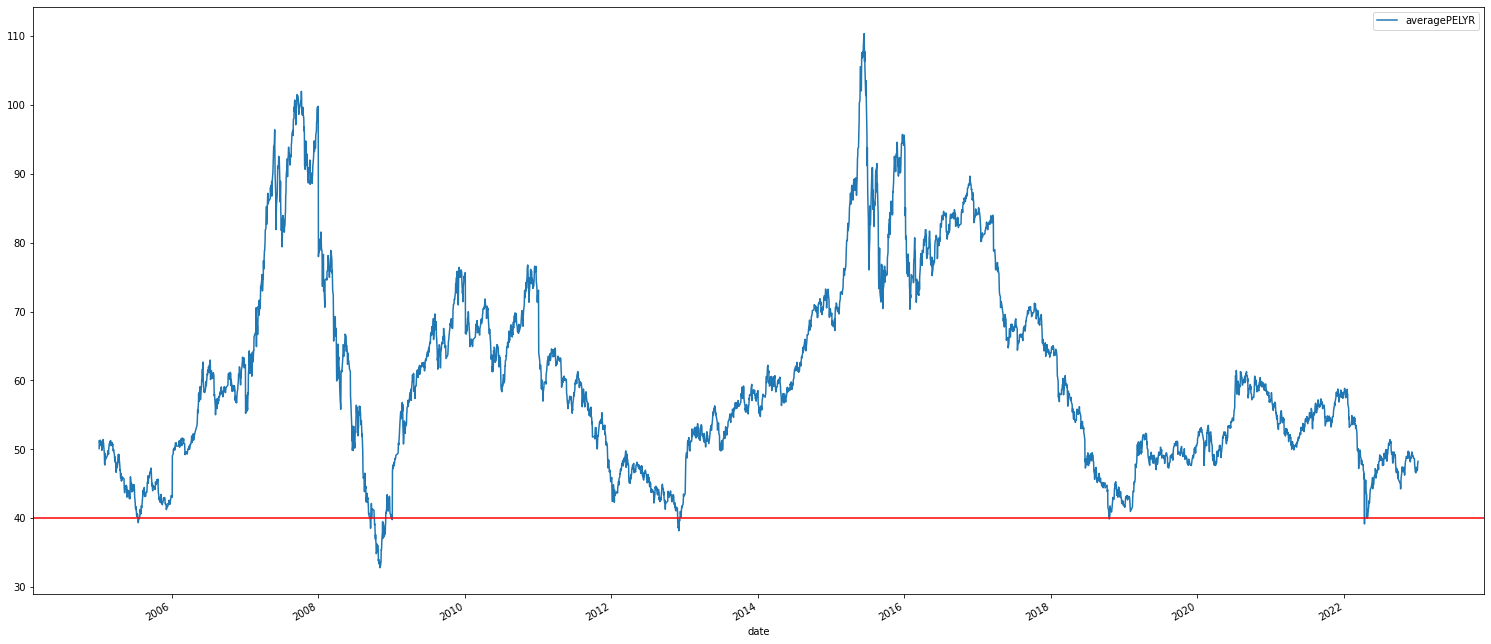

In [72]:
import matplotlib.pyplot as plt

stock_a_pe_df = ak.stock_a_pe(symbol="all")
stock_a_pe_df.index = pd.to_datetime(stock_a_pe_df['date'])
stock_a_pe_df[['averagePELYR']].plot(kind='line', figsize=(26, 12))
plt.axhline(y=40, color='r', linestyle='-')

In [ ]:
print(stock_a_pe_df["2007":"2009"][['averagePELYR']].min())
print(stock_a_pe_df["2014":"2018"][['averagePELYR']].min())
min = stock_a_pe_df["2021":"2023"][['averagePELYR']].min()
stock_a_pe_df[stock_a_pe_df['averagePELYR'].astype(float) <= 40]

In [73]:
2.2579 / 2.0775 -1 

0.0868351383874848